## Customer Churn Analysis

In [1]:
# Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import seaborn as sns

In [2]:
# Define path to excel file
file_path = "prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = "vw_churndata"

# Read the data from the specified sheet into a pandas dataframe
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data
data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### Data Processing

In [3]:
# Drop columns that won't be used for for prediction
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    "gender", "married", "state", "value_deal", "phone_service", "multiple_lines", "internet_service", "internet_type", "online_security", "online_backup",
    "device_protection_plan", "premium_support", "streaming_tv", "streaming_movies", "streaming_music", "unlimited_data", "contract", "paperless_billing", "payment_method"
]

In [4]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable "Customer Status"
data['customer_status'] = data['customer_status'].map({"Stayed":0, "Churned": 1})

In [5]:
data

,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,1,35,0,4,7,27,5,1,0,1,...,1,1,1,65.60,593.30,0,0,381.51,974.81,0
1,0,45,1,12,14,13,5,1,1,1,...,0,0,1,-4.00,542.40,38,10,96.21,610.28,0
2,1,51,0,21,4,35,4,1,0,1,...,0,1,0,73.90,280.85,0,0,134.60,415.45,1
3,1,79,0,9,3,21,3,1,0,1,...,0,1,0,98.00,1237.85,0,0,361.66,1599.51,1
4,0,80,0,17,3,8,5,1,0,1,...,0,1,1,83.90,267.40,0,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,41,0,19,6,33,5,1,1,1,...,0,1,1,74.40,896.75,0,0,37.96,934.71,1
6003,1,51,1,6,0,19,0,0,0,1,...,2,0,1,45.25,3139.80,0,0,0.00,3139.80,0
6004,0,65,1,10,14,25,5,1,1,1,...,0,1,0,74.95,2869.85,0,0,599.64,3469.49,1
6005,1,23,0,13,2,10,5,1,1,1,...,1,1,1,70.15,4480.70,0,0,2107.52,6588.22,0


In [6]:
# Split data into features and target
X = data.drop("customer_status", axis=1)
y = data['customer_status']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
5632,1,27,1,10,15,14,5,1,0,1,...,1,1,1,0,90.65,3974.15,0,0,1045.00,5019.15
5838,1,65,0,13,6,31,1,1,0,1,...,1,2,1,1,84.35,3858.05,0,0,1386.00,5244.05
2348,0,26,0,0,14,22,5,1,1,1,...,1,1,1,1,116.60,7049.50,0,0,2654.40,9703.90
5332,0,54,1,10,0,7,5,1,0,0,...,0,2,0,1,19.70,452.55,0,0,729.84,1182.39
5661,1,30,1,0,6,4,5,1,0,1,...,1,0,0,1,50.20,668.85,0,0,56.70,725.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,41,1,0,1,26,3,1,0,1,...,0,1,1,1,64.15,1274.45,0,100,675.60,2050.05
5191,0,58,0,19,1,35,5,1,1,1,...,1,0,1,0,97.35,2119.50,0,0,190.26,2309.76
5226,0,51,1,10,11,26,1,1,1,1,...,0,0,1,0,99.45,4138.05,30,140,1455.30,5702.89
5390,1,21,0,18,2,6,5,1,0,0,...,0,0,0,1,21.10,385.55,0,0,578.34,963.89


### Train Random Forest Model

In [9]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the Model
# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[788  53]
 [125 236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.82      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



In [11]:
# Feature selection using feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

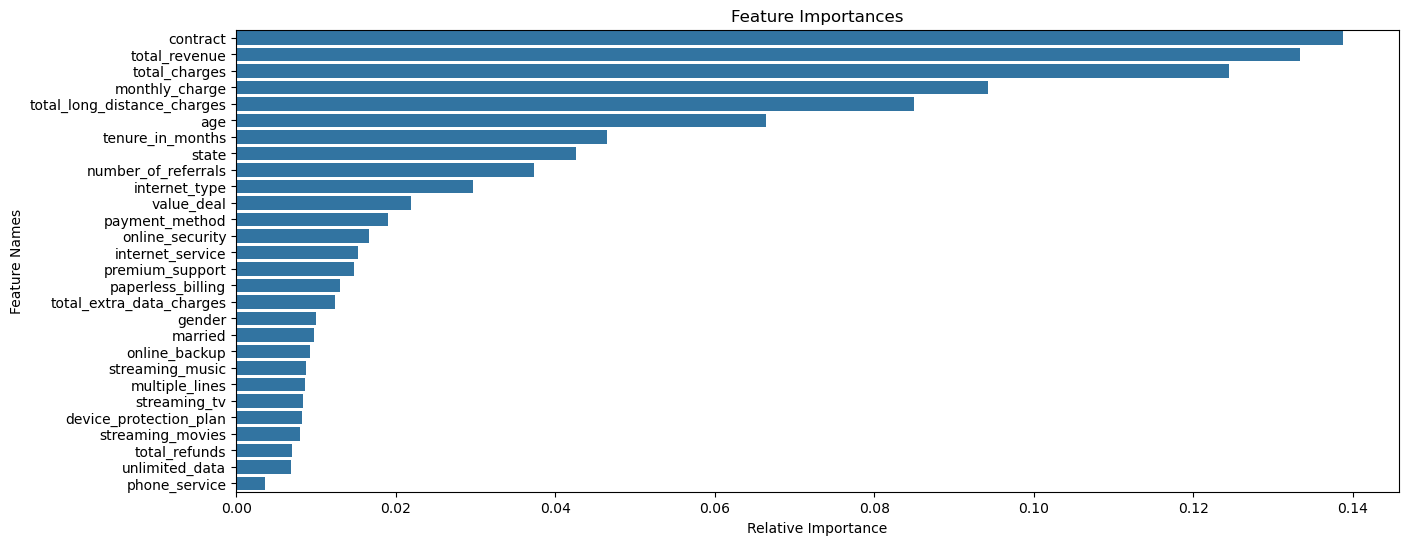

In [12]:
# Plot the feature importance
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.show()

### Prediction on New Data

In [14]:
# Define the path to the joiner data excel file
file_path = "prediction_data.xlsx"

# Define sheet name to read data from
sheet_name = "vw_joindata"

# Read the data from the specified sheet into a pandas dataframe
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
new_data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0,0,3.62,37.32,Joined,Others,Others


In [15]:
# Retain the original dataframe to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer ID column
customer_ids = new_data['customer_id']

# Drop columns that won't be used for prediction in the unencoded dataframe
new_data = new_data.drop(["customer_id", "customer_status", "churn_category", "churn_reason"], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make Predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original dataframe
original_data['customer_status_predicted'] = new_predictions

# Filter the dataframe to include only records predicted as "Churned"
original_data = original_data[original_data["customer_status_predicted"]==1]

# Save the result
original_data.to_csv("predictions.csv")